# Прогнозирование оттока клиентов банка
#####  В банковской сфере предсказание оттока клиентов имеет большое значение, поскольку это позволяет банкам удовлетворять потребности клиентов, улучшать стратегии удержания и экономить затраты, связанные с привлечением новых клиентов. Выявление клиентов, находящихся в риске, позволяет банкам внедрять персонализированные стратегии удержания, улучшая опыт клиента и снижая уровни оттока.
##### В этом проекте проведем исследовательский анализ данных и разработаем модель для прогнозирования, какие клиенты вероятно покинут банк на основе исторических данных и различных признаков. 
##### Целью этой работы является предоставить исследовательские выводы и рекомендации банку по смягчению оттока, улучшению удовлетворенности клиентов и развитию долгосрочных отношений с клиентами.

## 1. Импорт библиотек

In [121]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score,classification_report,confusion_matrix

## 2. Загрузка данных

In [46]:
df = pd.read_csv("C:/Users/HP/Desktop/df_ML/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## 3. Исследовательский анализ данных

In [71]:
df.shape

(10000, 14)

In [70]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [27]:
# Проверка статистических значений для полей с числовым типом данных
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [51]:
# Переменная "Exited" показывает,является ли клиент существующим клиентом (0) или новым клиентом (1) и вычисляет процентное распределение.
df['Exited'].value_counts(normalize=True)*100

Exited
0    79.63
1    20.37
Name: proportion, dtype: float64

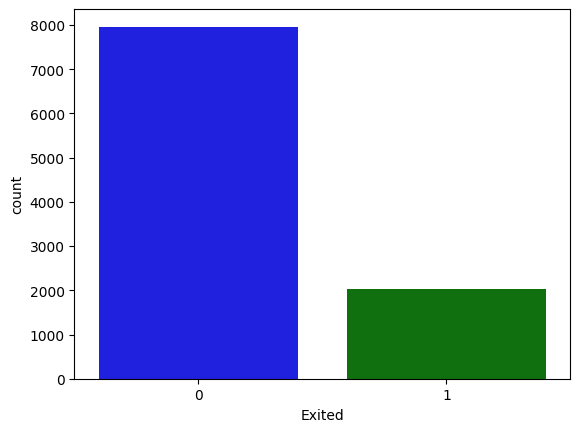

In [131]:
colors = ['blue', 'green']
sns.countplot(x="Exited", data=df, hue='Exited', palette=colors, legend=False)
plt.show()

In [25]:
# Распределение клиентов по полу
df['Gender'].value_counts(normalize=True)*100

Gender
Male      54.57
Female    45.43
Name: proportion, dtype: float64

In [26]:
df.groupby('Gender')['Exited'].value_counts(normalize=True).mul(100)

Gender  Exited
Female  0         74.928461
        1         25.071539
Male    0         83.544072
        1         16.455928
Name: proportion, dtype: float64

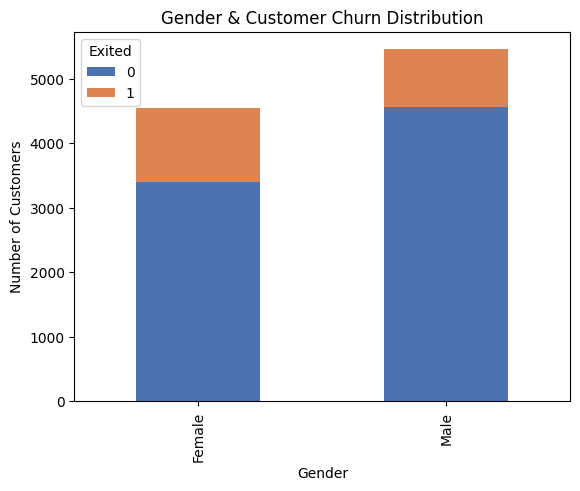

In [132]:
palette = "deep" 
sns.set_palette(palette)
pd.crosstab(df['Gender'], df['Exited']).plot(kind='bar', stacked=True)
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.title('Gender & Customer Churn Distribution')

plt.show()

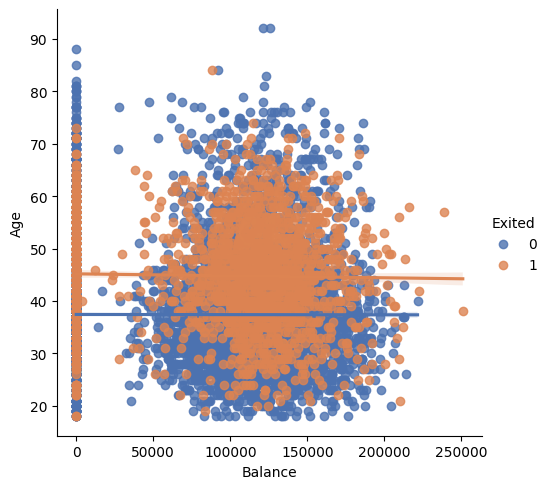

In [162]:
sns.lmplot(x='Balance',y='Age',hue='Exited',data=df)
# Здесь мы видим, что клиенты старше 45 лет склонны к уходу чаще, чем младше 45 лет

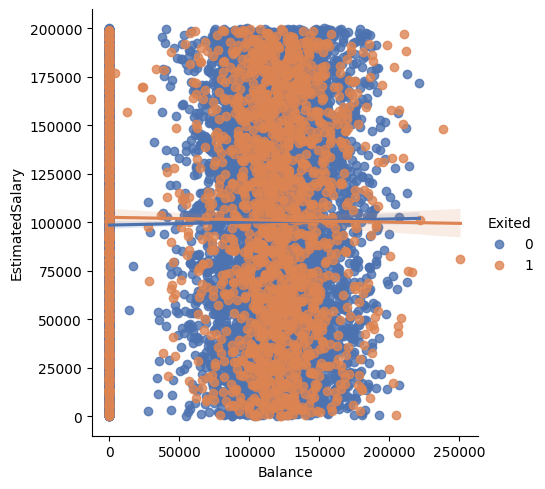

In [163]:
sns.lmplot(x='Balance',y='EstimatedSalary',hue='Exited',data=df)
# Клиенты которые зарплата составляет от 100 000 до 150 000, чаще покидают банк.

<Axes: xlabel='Exited', ylabel='count'>

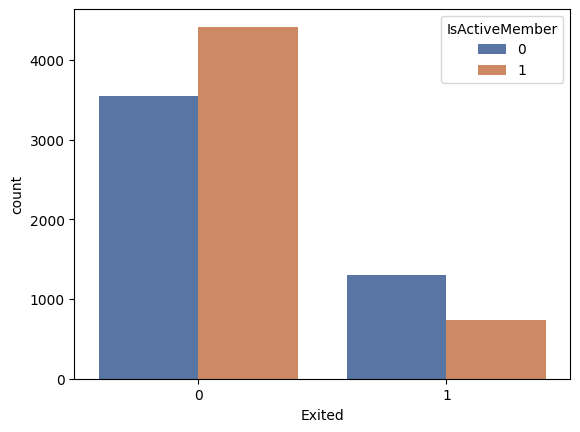

In [54]:
sns.countplot(x=df['Exited'],hue=df['IsActiveMember'])
#Активные клиенты чаще уходят из банка, чем пассивные

<Axes: xlabel='Exited', ylabel='count'>

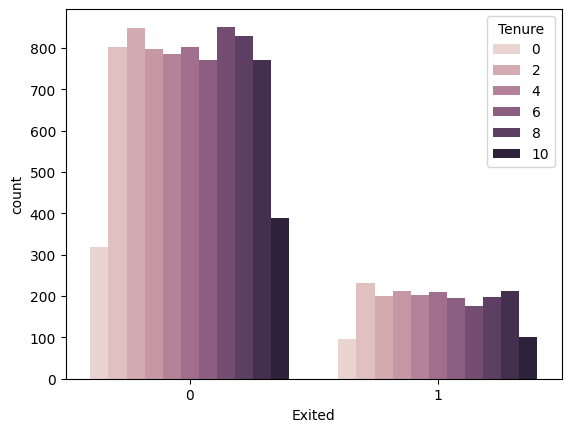

In [68]:
sns.countplot(x=df['Exited'],hue=df['Tenure'])
# Чаще всего клиенты покидают банк после 1 года и реже уходят, пройдя 9 лет

## 4. Преобразование данных

#### Удаление столбцов
Удаляем столбцы «RowNumber», «CustomerId» и «Surname» из Data Frame, поскольку не предоставляют никакого важного фактора для построения модели.

In [75]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

#### Преобразование в числовые представления
Преобразуем столбцы «Geography» и «Gender» в числовые представления. Это позволяет нам включать эти данные для обучения модели.

In [98]:
categorical_columns = ['Geography','Gender']
one_hot_encoded = pd.get_dummies(df[categorical_columns])
df_encoded = pd.concat([df, one_hot_encoded], axis=1)
df_encoded.drop(categorical_columns,axis=1,inplace=True)
df_encoded.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,True,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,False,True,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,True,False,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,0,True,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,False,True,True,False


#### Нормализация
Выполняем нормализацию числовых признаков, чтобы привести их значения к диапазону [0, 1]. Нормализуя данные, мы можем избежать любой систематической ошибки, повысив тем самым точность и надежность наших результатов.







In [91]:
from sklearn.preprocessing import MinMaxScaler
continuous_columns = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']
scaler = MinMaxScaler()
df_encoded[continuous_columns] = scaler.fit_transform(df_encoded[continuous_columns])
df_encoded.head()

## 5. Построение модели


In [124]:
# разделение данных на обучающую и тестовую выборки
X = df_encoded.drop('Exited',axis=1)
y = df_encoded['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 13)
(2000, 13)
(8000,)
(2000,)


In [130]:
classifiers = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('KNN', KNeighborsClassifier(n_neighbors=5)),
    ('Gaussion NB',GaussianNB()),
]
# выполняется кросс-валидация для каждого классификатора
for clf_name, clf in classifiers:
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
    
    # вычисляем средние значения точности
    avg_accuracy = scores.mean()
    avg_precision = cross_val_score(clf, X_train, y_train, cv=5, scoring='precision_macro').mean()
    avg_recall = cross_val_score(clf, X_train, y_train, cv=5, scoring='recall_macro').mean()
    
    print(f'Classifier: {clf_name}')
    print(f'Average Accuracy: {avg_accuracy:.4f}')
    print(f'Average Precision: {avg_precision:.4f}')
    print(f'Average Recall: {avg_recall:.4f}')
    print('-----------------------')

Classifier: Logistic Regression
Average Accuracy: 0.7883
Average Precision: 0.6057
Average Recall: 0.5202
-----------------------
Classifier: Decision Tree
Average Accuracy: 0.7919
Average Precision: 0.6764
Average Recall: 0.6864
-----------------------
Classifier: Random Forest
Average Accuracy: 0.8641
Average Precision: 0.8222
Average Recall: 0.7180
-----------------------
Classifier: KNN
Average Accuracy: 0.7595
Average Precision: 0.5180
Average Recall: 0.5069
-----------------------
Classifier: Gaussion NB
Average Accuracy: 0.7839
Average Precision: 0.5958
Average Recall: 0.5245
-----------------------


Classification Report
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1604
           1       0.77      0.41      0.53       396

    accuracy                           0.86      2000
   macro avg       0.82      0.69      0.72      2000
weighted avg       0.85      0.86      0.84      2000


---------------------------------------------



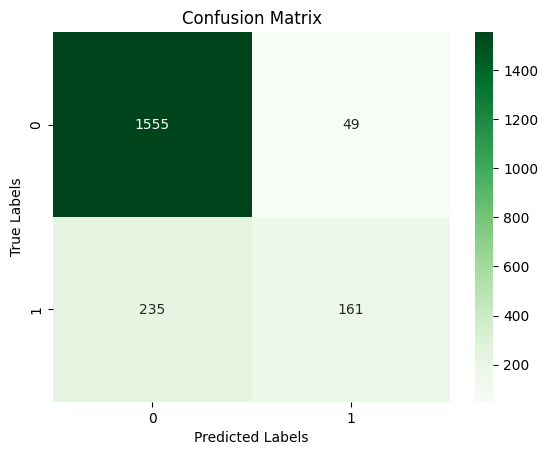

In [127]:
# создаем классификатора Случайный лес(Random Forest)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=47)

# Обучение модели
rf_classifier.fit(X_train, y_train)

# Прогнозирование на тестовой выборке
y_pred = rf_classifier.predict(X_test)

# Оценка модели
evaluate_model(y_test, y_pred)

## 6. Заключение
##### Эксперименты с различными классификаторами показали, что модель "Случайный лес" (Random Forest) проявила высокую производительность на тестовой выборке. Метрики precision (точность) и recall (полнота) для класса 1 (пользователи, покидающие банк) достигли значительных значений, а также общая точность модели составила 86%. Это свидетельствует о том, что модель успешно справляется с предсказанием оттока клиентов.
##### В целом, разработанная модель предоставляет банку инструмент для прогнозирования оттока клиентов и принятия мер по их удержанию. Однако, рекомендуется провести дополнительные исследования и тестирования для оптимизации и повышения точности модели в реальных условиях.